# 1 Dataset exploration

In this notebook, the BIP dataset is explored in order to get used to the different features. The project is based on a sales forecasting dataset with aggregated information for different products throughout a 3-years time window. The full dataset is split time-wise into train and test sets with the following criterion.

- 2 years and 6 months in the **train set**
- 6 months in the **test set**

Data is aggregated weekly from December 2016 to December 2019. In the train set, there is data available for 43 SKU (unique identifier for the products) but the target for the prediction is restricted to 12 SKUs.

---

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

# select the style from fivethityeight website
mpl.rcdefaults() 
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams.update({'font.size': 16})

%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 16)
mpl.rcParams['figure.dpi'] = 80

In [2]:
# Column names alias to have a single word
alias = {
    'Unnamed: 0': 'date',
    'sku': 'sku',
    'pack': 'pack',
    'size (GM)': 'size',
    'brand': 'brand',
    'price': 'price',
    'POS_exposed w-1': 'exposed',
    'volume_on_promo w-1': 'volume',
    'sales w-1': 'sales',
    'scope': 'scope',
    'target': 'target'
}

In [3]:
raw = pd.read_csv('data/train.csv')
raw = raw.rename(columns=alias)
raw.head()

,date,sku,pack,size,brand,price,exposed,volume,sales,scope,target
0,WE 10 December 2016,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
1,WE 17 December 2016,2689,SINGLE,395.41,BRAND1,1.15,1.0,17.676112,24175.0,0,23521.0
2,WE 24 December 2016,2689,SINGLE,395.41,BRAND1,1.16,1.0,24.482803,23521.0,0,22075.0
3,WE 31 December 2016,2689,SINGLE,395.41,BRAND1,1.16,0.0,19.410646,22075.0,0,16492.0
4,WE 07 January 2017,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.812030,16492.0,0,25971.0


In [4]:
# Convert date to datetime object
df = raw.copy()
df.date = df.date.apply(lambda x: datetime.strptime(x, "WE %d %B %Y"))
# df.set_index('date', inplace=True)
df.head()

,date,sku,pack,size,brand,price,exposed,volume,sales,scope,target
0,2016-12-10,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
1,2016-12-17,2689,SINGLE,395.41,BRAND1,1.15,1.0,17.676112,24175.0,0,23521.0
2,2016-12-24,2689,SINGLE,395.41,BRAND1,1.16,1.0,24.482803,23521.0,0,22075.0
3,2016-12-31,2689,SINGLE,395.41,BRAND1,1.16,0.0,19.410646,22075.0,0,16492.0
4,2017-01-07,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.812030,16492.0,0,25971.0


---
## 1.1 Dataset exploration

In [5]:
print("Number of examples:   ", df.shape[0])
print("Number of variables:  ", df.shape[1])

Number of examples:    5719
Number of variables:   11


In [6]:
df.describe(include='all')

,date,sku,pack,size,brand,price,exposed,volume,sales,scope,target
count,5719,5719.000000,5719,5719.000000,5719,5719.000000,5676.000000,5676.000000,5676.000000,5719.000000,5719.000000
unique,133,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-03-03 00:00:00,NaN,SINGLE,NaN,BRAND1,NaN,NaN,NaN,NaN,NaN,NaN
freq,43,NaN,4256,NaN,1729,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1797.255814,NaN,245.581860,NaN,1.190622,2.909796,31.327102,50877.853946,0.279070,50834.613569
std,NaN,784.923142,NaN,192.704161,NaN,0.697537,8.498269,36.538638,94545.768566,0.448581,94505.550714
min,NaN,144.000000,NaN,87.870000,NaN,0.300000,0.000000,0.000000,813.000000,0.000000,813.000000
25%,NaN,1065.000000,NaN,114.230000,NaN,0.560000,0.000000,0.972649,12464.500000,0.000000,12463.000000


As it can be noticed from the previous outputs, the dataset is composed by 5719 examples and 11 features. Since the _target_ feature is the column for the prediction, the dataset is actually composed by 10 features.

![Feature Definition](docs/feature_definition.png)

As it can be noticed, the target value can be inferred from the previous week sales of the SKU. This is due to the fact that data is available in order to simulate a real time series case. Thus, we are asked to not use the column as a feature 'from the future' but as it is

---
## 1.2 Feature Exploration

In this section, we are going to explore the different features and relation among them.

In [7]:
numerical_features = ['size', 'price', 'exposed', 'volume', 'sales', 'target']

In [8]:
print("SKU is a categorical feature.   Number of unique samples:  " + str(df.sku.unique().size))
print("Pack is a categorical feature.  Number of unique samples:  " + str(df.pack.unique().size))
print("Brand is a categorical feature. Number of unique samples:  " + str(df.brand.unique().size))

SKU is a categorical feature.   Number of unique samples:  43
Pack is a categorical feature.  Number of unique samples:  2
Brand is a categorical feature. Number of unique samples:  5


In [9]:
print("Number of samples with null values: " + str(df.sales.isnull().sum()))

Number of samples with null values: 43


In [10]:
# As it can be noticed, the null value corresponds to the first date of each SKU
df[df.sales.isnull()].groupby('date').count()

,sku,pack,size,brand,price,exposed,volume,sales,scope,target
date,,,,,,,,,,
2016-12-10,43,43,43,43,43,0,0,0,43,43


As we only have 43 null values from 5719 in total, a possible approach could be to remove that samples them instead of trying to fill them with mean, median or other options. Actually, we will loose data for the first week, but there will be enough remainder data.

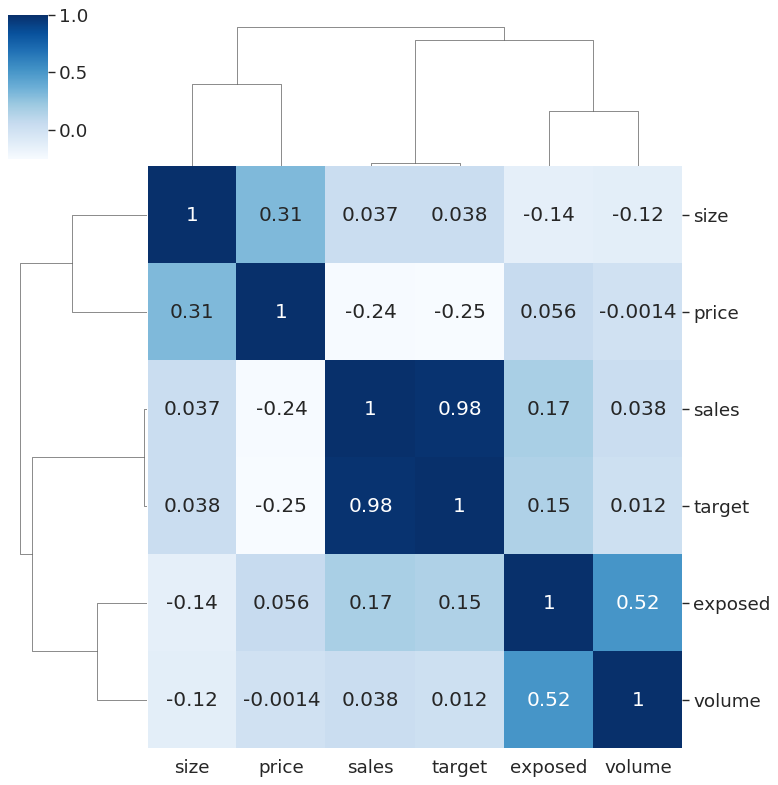

In [11]:
sns.set(font_scale=1.5)
sns.clustermap(df.dropna()[numerical_features].corr(), cmap="Blues", annot=True)

As it can be noticed, there is a high correlation between sales and target. That was supposed to be as from the feature definition, _sales_ references the sales from the week $w-1$ and _target_ references the sales from the week $w$. 

---
## 1.3 Data Series

As it can be noticed, data is a time series. We should take into account, when exploring data, the features from different products should not be mixed, since one product feature is independent from the same feature of a different product. 

However, some products can influence other ones. For this approach, we should make an _association rule mining_ but as in the test set we will have to predict the sales for the next week and we do not have all the sku available, just some of them, a rule mining approach is not provided.

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [13]:
full_serie = df.set_index('date')
full_serie.head()

,sku,pack,size,brand,price,exposed,volume,sales,scope,target
date,,,,,,,,,,
2016-12-10,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
2016-12-17,2689,SINGLE,395.41,BRAND1,1.15,1.0,17.676112,24175.0,0,23521.0
2016-12-24,2689,SINGLE,395.41,BRAND1,1.16,1.0,24.482803,23521.0,0,22075.0
2016-12-31,2689,SINGLE,395.41,BRAND1,1.16,0.0,19.410646,22075.0,0,16492.0
2017-01-07,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.812030,16492.0,0,25971.0


The previous DataFrame is indexed by the date. However, dates are repeated, since we have one entry for each SKU. For this reason, we are going to group data by date and sku, so we can plot data in a more feasible way. The operation used for grouping, `mean()` in this case, is not relevant as we are keeping the same number of rows due to the data structure.

In [14]:
serie = df.dropna() # Removing rows with NaN values
serie = serie.groupby(['date', 'sku'])

packs = serie.pack.apply(lambda pack: ''.join(pack))
brands = serie.brand.apply(lambda brand: ''.join(brand))

serie = serie.mean()
serie['pack'] = packs
serie['brand'] = brands
serie.head()

size  price  exposed      volume     sales  scope    target  \
date       sku                                                                  
2016-12-17 144  114.23   2.00     45.0  100.000000   51320.0      1   66431.0   
           546  114.23   0.52      0.0   19.397366   76232.0      1   69788.0   
           549  114.23   0.52      0.0   28.785743   37595.0      1   32822.0   
           554  114.23   0.52      0.0   21.694761  122206.0      1  111678.0   
           686  125.65   2.00     55.0  100.000000   54995.0      1   66652.0   

                  pack   brand  
date       sku                  
2016-12-17 144   MULTI  BRAND2  
           546  SINGLE  BRAND2  
           549  SINGLE  BRAND2  
           554  SINGLE  BRAND2  
           686   MULTI  BRAND4

In [15]:
serie_brand = df.dropna() # Removing rows with NaN values
serie_brand = serie_brand.groupby(['date', 'brand'])

serie_brand = serie_brand.mean()
serie_brand.head()

sku        size     price    exposed     volume  \
date       brand                                                             
2016-12-17 BRAND1  2697.230769  326.464615  1.391538   0.153846   6.681060   
           BRAND2   642.500000  114.230000  0.766667   7.500000  37.008930   
           BRAND3  1535.666667  252.621667  0.953333   0.000000   4.997912   
           BRAND4   959.000000  125.650000  1.013333  18.166667  51.359953   
           BRAND5  2363.500000  307.540000  1.320000  12.166667  99.686538   

                          sales  scope        target  
date       brand                                      
2016-12-17 BRAND1  20625.846154    0.0  19992.461538  
           BRAND2  63896.833333    1.0  61135.333333  
           BRAND3  59634.083333    0.0  57896.083333  
           BRAND4  53450.833333    1.0  53608.500000  
           BRAND5   9182.500000    0.0   9996.500000

In [16]:
# Resampling function
def resample(df, rule, *args, **kwargs):
    levels = [x for x in range(1, len(df.index.levels))]
    return df.unstack(level=levels).resample(rule, *args, **kwargs).mean().stack(level=levels)

In [17]:
# Get values to plot filtering by date
def filter_dates(df, since='', to=''):
    index = df.index.get_level_values(0).to_series()
    levels = [x for x in range(1, len(df.index.levels))]
    
    since = since if since else index.min()
    to = to if to else index.max()
    
    return df.unstack(level=levels).loc[since:to].stack(level=levels)

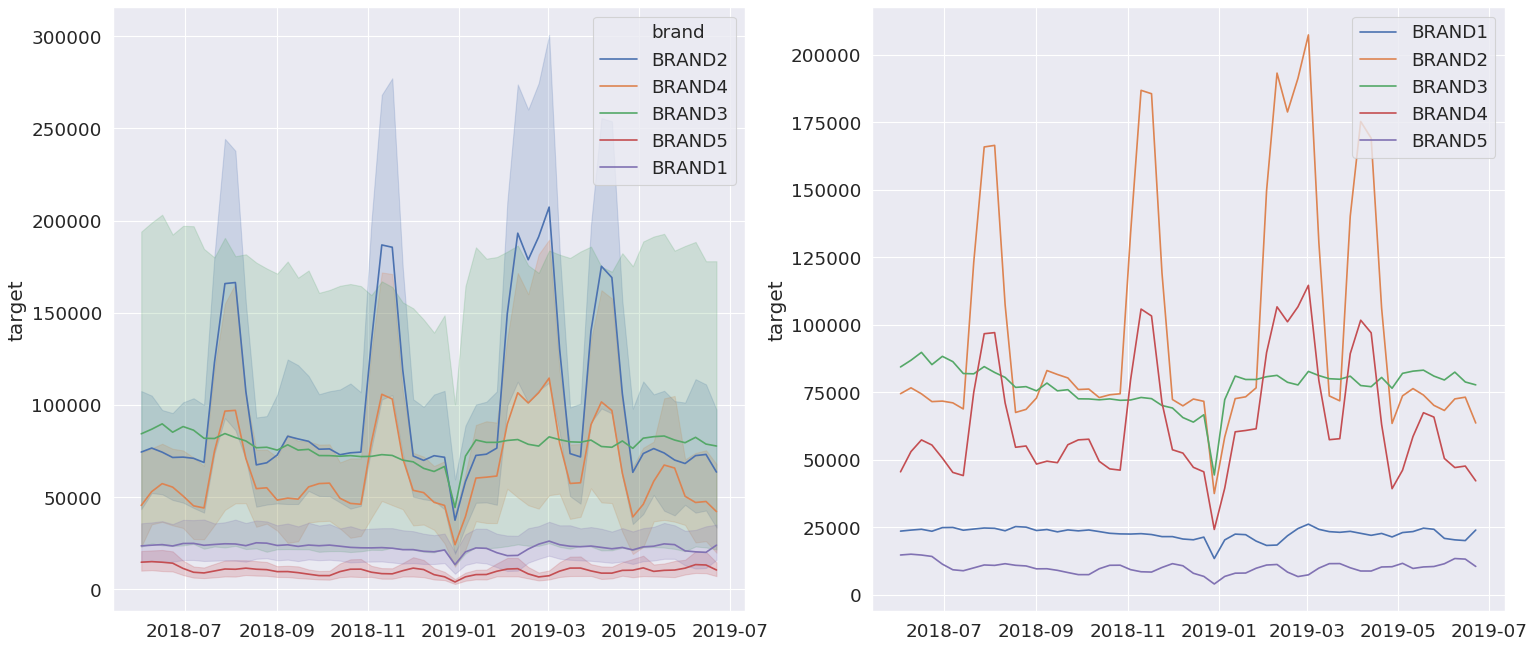

In [18]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))

# First plot with error estimator
plot = filter_dates(serie, since='2018-6')

x = plot.index.get_level_values(0).to_series().values
y = plot['target']
hue = plot['brand']

sns.lineplot(x=x, y=y, hue=hue, ax=axes[0])

# Second plot mean value
plot = filter_dates(serie_brand, since='2018-6')

x = plot.index.get_level_values(0).to_series().values
y = plot['target']
hue = plot.index.get_level_values(1).to_series().values

sns.lineplot(x=x, y=y, hue=hue, ax=axes[1])

---
## 1.4 Data Series - Stationary

In this section, we are going to test if the time series data is stationary by using line plots and basic summary statistics as well as computing and interpreting statistical significance tests such as the Dickey-Fuller test.

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

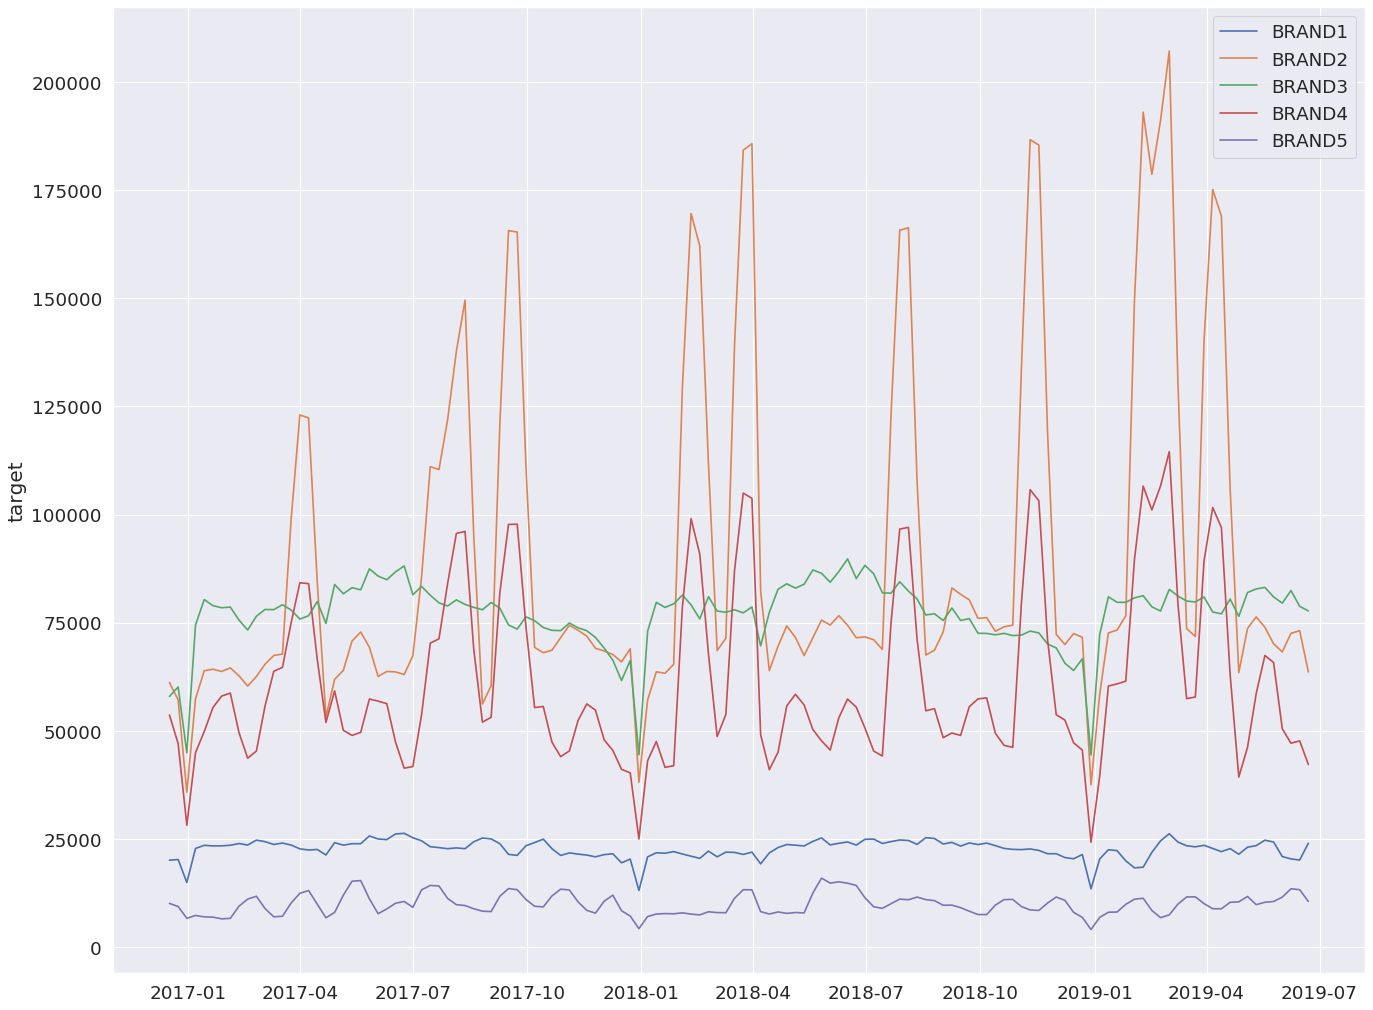

In [20]:
x = serie_brand.index.get_level_values(0).to_series().values
y = serie_brand['target']
hue = serie_brand.index.get_level_values(1).to_series().values
sns.lineplot(x=x, y=y, hue=hue)

At first, we are going to check if the target variables (sales in week $w$) has any trend or seasonal effects by plotting the target variable grouped by brands. 

In [21]:
def plotseasonal(decomposition, axes, title=""):
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_title(title)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

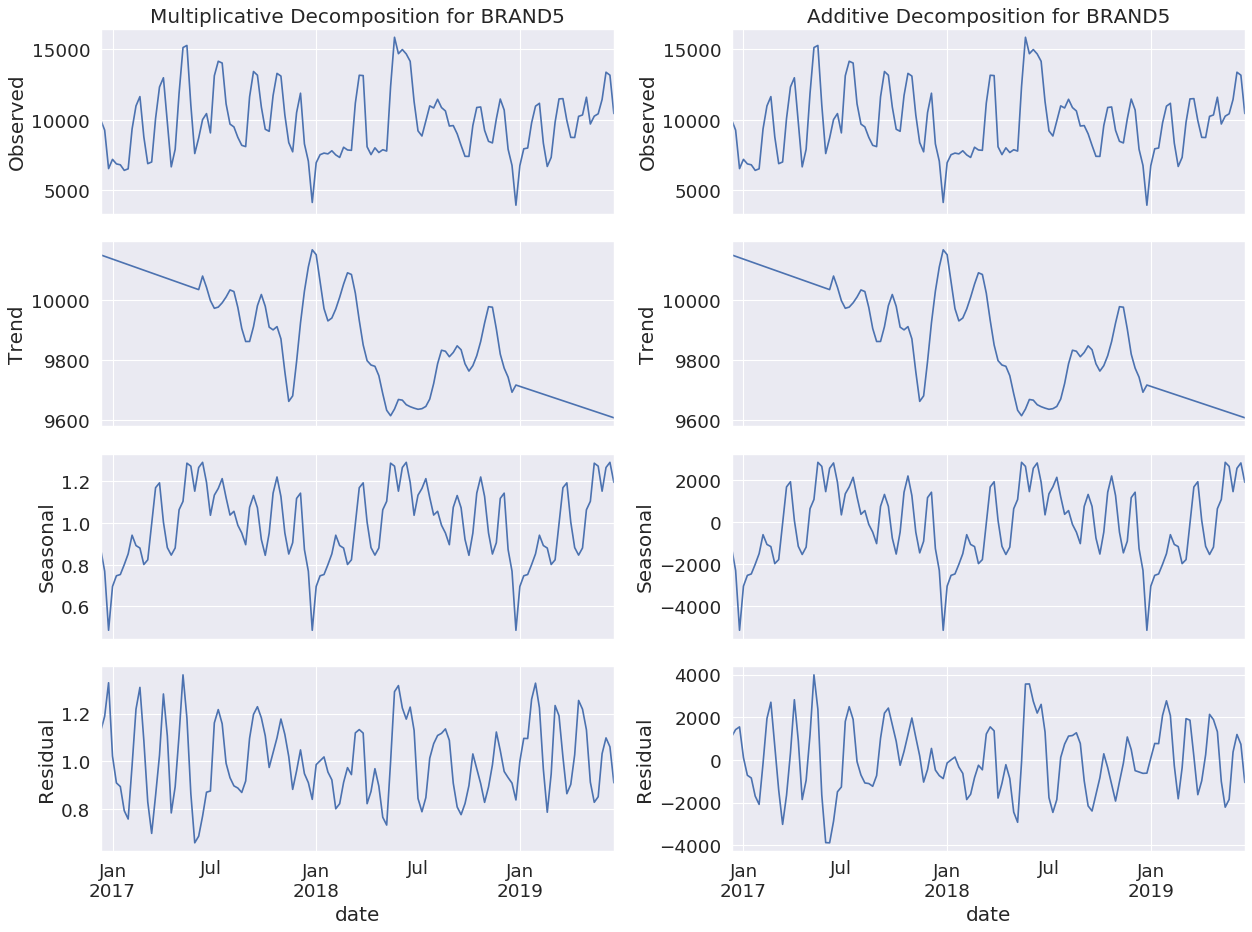

In [22]:
brand = 'BRAND5'

decomposition_multiplicative = seasonal_decompose(
    serie_brand['target'].loc[:, brand], 
    model='multiplicative', 
    extrapolate_trend='freq')
decomposition_additive = seasonal_decompose(
    serie_brand['target'].loc[:, brand], 
    model='additive', 
    extrapolate_trend='freq')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,12))
plotseasonal(decomposition_multiplicative, axes[:,0],"Multiplicative Decomposition for {}".format(brand))
plotseasonal(decomposition_additive, axes[:,1], "Additive Decomposition for {}".format(brand))
plt.tight_layout()
plt.show();

As it can be noticed from the previous charts, all the brands seems to have a small seasonal trend by months. Before assuming that data is non-stationary, we are going to perform the Dickey-Fuller test.

- If $p-value \gt 0.05$ accept the null hypothesis and data is therefore non-stationary
- If $p-value \leq 0.05$ reject the null hypothesis and data is therefore stationary

In [23]:
for i in range(1,6):
    adf = adfuller(serie_brand['target'].loc[:,'BRAND{}'.format(str(i))])
    if (adf[1] > 0.05): 
        print("\x1b[31m", end = '')
    print('p-value of sales for BRAND{0}:  {1:.6f}'.format(i, adf[1]))
    if (adf[1] > 0.05): 
        print("\x1b[0m", end = '')

p-value of sales for BRAND1:  0.065648
p-value of sales for BRAND2:  0.000078
p-value of sales for BRAND3:  0.000532
p-value of sales for BRAND4:  0.000332
p-value of sales for BRAND5:  0.003239


As it can be noticed from the Dickey-Fuller test, data actually seems to be stationary for all the brands, except for the first one. Therefore, we are going to perform the analysis for each SKU as the sales within a brand does not need to be dependent.

In [24]:
for i in df.sku.unique():
    adf = adfuller(full_serie[full_serie.sku == i]['target'])
    if (adf[1] > 0.05): 
        print("\x1b[31m", end = '')
    print('p-value of sales for SKU[{0:4g}]:  {1:.6f}'.format(i, adf[1]))
    if (adf[1] > 0.05): 
        print("\x1b[0m", end = '')

p-value of sales for SKU[2689]:  0.182745
p-value of sales for SKU[1027]:  0.000047
p-value of sales for SKU[2696]:  0.062326
p-value of sales for SKU[2698]:  0.109497
p-value of sales for SKU[1035]:  0.005635
p-value of sales for SKU[ 144]:  0.000000
p-value of sales for SKU[2704]:  0.000525
p-value of sales for SKU[1554]:  0.096161
p-value of sales for SKU[2705]:  0.041261
p-value of sales for SKU[2707]:  0.365167
p-value of sales for SKU[2711]:  0.316227
p-value of sales for SKU[2712]:  0.077263
p-value of sales for SKU[1051]:  0.000039
p-value of sales for SKU[2718]:  0.016499
p-value of sales for SKU[ 546]:  0.000122
p-value of sales for SKU[1058]:  0.000094
p-value of sales for SKU[ 549]:  0.005342
p-value of sales for SKU[1065]:  0.000071
p-value of sales for SKU[ 554]:  0.006861
p-value of sales for SKU[ 686]:  0.005101
p-value of sales for SKU[ 688]:  0.000135
p-value of sales for SKU[1206]:  0.000116
p-value of sales for SKU[2360]:  0.319929
p-value of sales for SKU[2365]:  0

As it can be shown, the red $p-value$ for red ones is greater than $0.05$, so data is non-stationary for those values. Before making the assumption that data is fully stationary, we can compute the weekly sales as the difference between the current week and the previous one, and then compute the $p-value$ for that feature. Thus, we will make the data stationary as it is shown.

In [25]:
df_diff = full_serie.copy()
df_diff['diff'] = df_diff['target'] - df_diff['sales']
df_diff.head()

,sku,pack,size,brand,price,exposed,volume,sales,scope,target,diff
date,,,,,,,,,,,
2016-12-10,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0,NaN
2016-12-17,2689,SINGLE,395.41,BRAND1,1.15,1.0,17.676112,24175.0,0,23521.0,-654.0
2016-12-24,2689,SINGLE,395.41,BRAND1,1.16,1.0,24.482803,23521.0,0,22075.0,-1446.0
2016-12-31,2689,SINGLE,395.41,BRAND1,1.16,0.0,19.410646,22075.0,0,16492.0,-5583.0
2017-01-07,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.812030,16492.0,0,25971.0,9479.0


In [26]:
for i in df.sku.unique():
    adf = adfuller(df_diff[df_diff.sku == i]['diff'].dropna())
    if (adf[1] > 0.05): 
        print("\x1b[31m", end = '')
    print('p-value of sales for SKU[{0:4g}]:  {1:.6f}'.format(i, adf[1]))
    if (adf[1] > 0.05): 
        print("\x1b[0m", end = '')

p-value of sales for SKU[2689]:  0.000000
p-value of sales for SKU[1027]:  0.000000
p-value of sales for SKU[2696]:  0.000000
p-value of sales for SKU[2698]:  0.000000
p-value of sales for SKU[1035]:  0.000000
p-value of sales for SKU[ 144]:  0.000000
p-value of sales for SKU[2704]:  0.000000
p-value of sales for SKU[1554]:  0.000000
p-value of sales for SKU[2705]:  0.000000
p-value of sales for SKU[2707]:  0.000000
p-value of sales for SKU[2711]:  0.000000
p-value of sales for SKU[2712]:  0.000000
p-value of sales for SKU[1051]:  0.000000
p-value of sales for SKU[2718]:  0.000000
p-value of sales for SKU[ 546]:  0.000000
p-value of sales for SKU[1058]:  0.000000
p-value of sales for SKU[ 549]:  0.000000
p-value of sales for SKU[1065]:  0.000000
p-value of sales for SKU[ 554]:  0.000000
p-value of sales for SKU[ 686]:  0.000000
p-value of sales for SKU[ 688]:  0.000000
p-value of sales for SKU[1206]:  0.000000
p-value of sales for SKU[2360]:  0.000000
p-value of sales for SKU[2365]:  0

As it is shown, all the $p-values$ are almost zero for each SKU, so we can predict the `diff` (weekly sales) feature better than the sales one, since we are able to compute one from the other and viceversa.

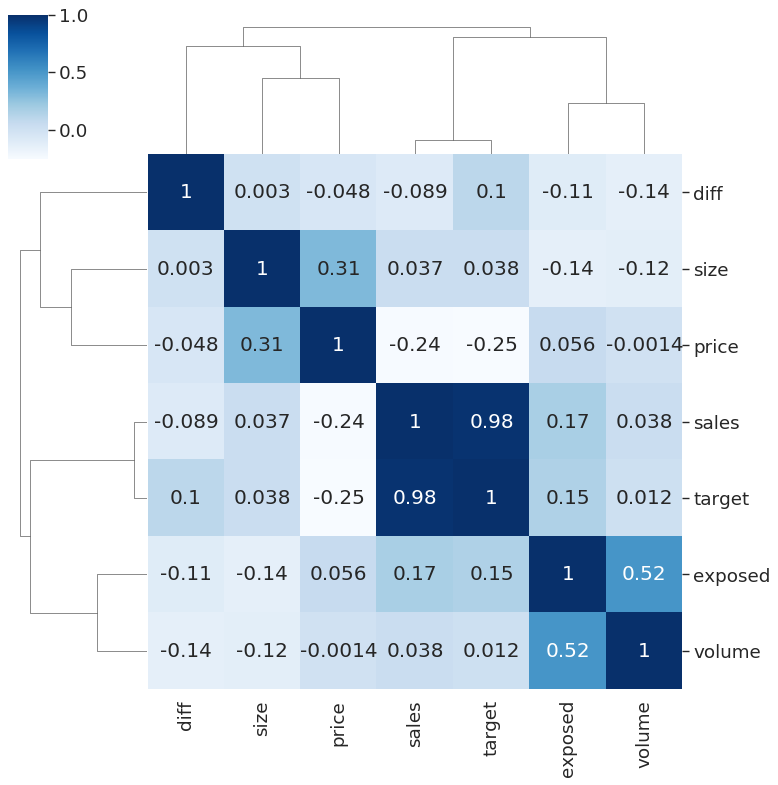

In [27]:
sns.set(font_scale=1.5)
sns.clustermap(df_diff.dropna()[numerical_features + ['diff']].corr(), cmap="Blues", annot=True)

Regarding the correlation among the features, it can be noticed that after computing the weekly sales, the correlation between sales and diff has decreased notably compared to the previous target feature.

Besides, we can plot the distribution of the several features and we can realize that the one that is the most similar to a Gaussian distribution is the _Weekly sales_, which is another approach to claim that weekly sales is stationay, while the other ones seems to be non-stationary.

Text(0.5, 1.0, 'Weekly sales')

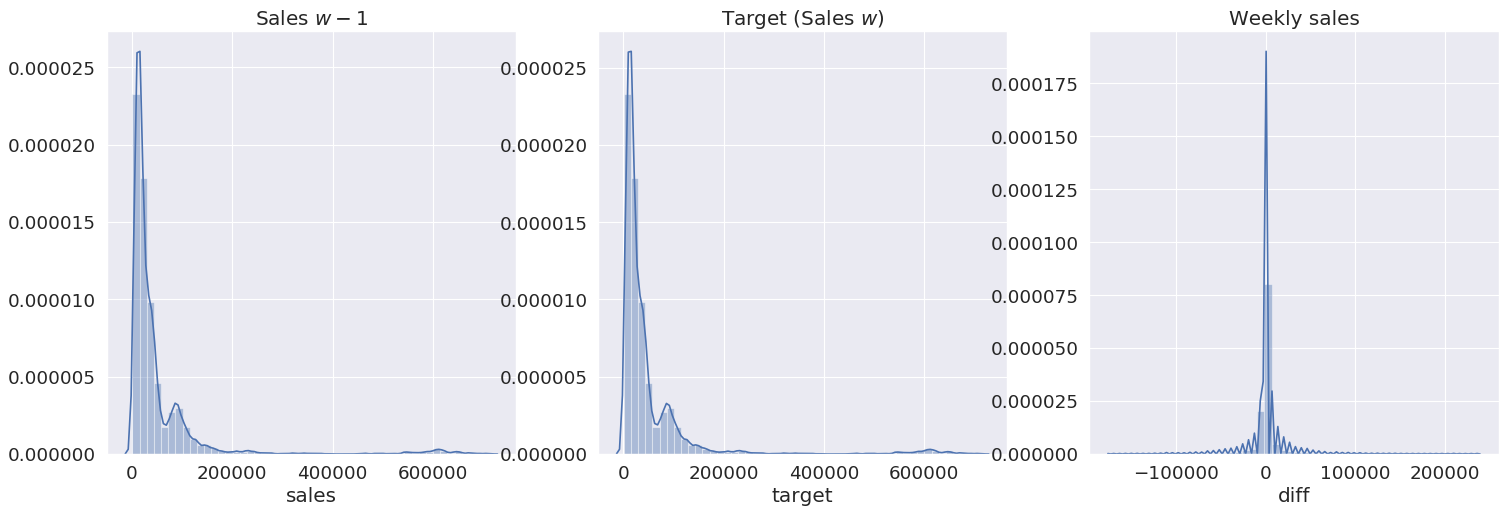

In [52]:
f, axes = plt.subplots(1, 3, figsize=(20, 7))
sns.distplot(df_diff['sales'], ax=axes[0]).set_title('Sales $w-1$')
sns.distplot(df_diff['target'], ax=axes[1]).set_title('Target (Sales $w$)')
sns.distplot(df_diff['diff'], ax=axes[2]).set_title('Weekly sales')